# Seattle Airbnb Prices Project


In this project we are going thru 4 phases as following
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Model Data and Results

# Business Understanding


We are intersted in answering three quesions
1. What are the top 5 expensive neighborhoods?
2. What are the top 5 expensive hosts?
3. Examine linear regression model for price prediction

# Data Understanding

First thing first is importing necessary libraries

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Taking a look into the data.

In [20]:
listing = pd.read_excel('listings.xlsx')

In [21]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [22]:
print('The data has ' + str(listing.shape[0]) + ' rows and ' +  str(listing.shape[1]) + ' Columns.')

The data has 3818 rows and 92 Columns.


In [23]:
list(listing.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


Checking the types of data

In [5]:
listing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

Generating descriptive statistics for the data

In [6]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3810.000000,3818.000000,3818.000000,3818.000000,3802.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,98115.694751,47.628961,-122.333103,3.349398,1.259469,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,16.490050,0.043052,0.031745,1.977599,0.590369,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,98101.000000,47.505088,-122.417219,1.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,98104.000000,47.609418,-122.354320,2.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,98112.000000,47.623601,-122.328874,3.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,98121.000000,47.662694,-122.310800,4.000000,1.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,98199.000000,47.733358,-122.240607,16.000000,8.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# Data Preparation

We are only going to choose relevant columns that will help us to answer the business questions.

In [7]:
df = listing[['id','neighbourhood', 'host_name', 'accommodates','bathrooms','bedrooms','beds','price','extra_people','minimum_nights',
              'review_scores_rating', 'cleaning_fee', 'weekly_price','monthly_price']]
df.head()

,id,neighbourhood,host_name,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,review_scores_rating,cleaning_fee,weekly_price,monthly_price
0,241032,Queen Anne,Maija,4,1.0,1.0,1.0,85,5,1,95.0,NaN,NaN,NaN
1,953595,Queen Anne,Andrea,4,1.0,1.0,1.0,150,0,2,96.0,40.0,1000.0,3000.0
2,3308979,Queen Anne,Jill,11,4.5,5.0,7.0,975,25,4,97.0,300.0,NaN,NaN
3,7421966,Queen Anne,Emily,3,1.0,0.0,2.0,100,0,1,NaN,NaN,650.0,2300.0
4,278830,Queen Anne,Emily,6,2.0,3.0,3.0,450,15,1,92.0,125.0,NaN,NaN


### Dropping the missing data

In [9]:
missing_listing_data = pd.DataFrame({'Count Missing Data': df.isnull().sum(), 'Percentage': (df.isnull().sum()/len(df))*100})
missing_listing_data

,Count Missing Data,Percentage
id,0,0.000000
neighbourhood,416,10.895757
host_name,2,0.052383
accommodates,0,0.000000
bathrooms,16,0.419068
bedrooms,6,0.157150
beds,1,0.026192
price,0,0.000000
extra_people,0,0.000000
minimum_nights,0,0.000000


In [10]:
df_no_missing = df.dropna()

In [11]:
df_no_missing.head()

,id,neighbourhood,host_name,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,review_scores_rating,cleaning_fee,weekly_price,monthly_price
1,953595,Queen Anne,Andrea,4,1.0,1.0,1.0,150,0,2,96.0,40.0,1000.0,3000.0
9,2493658,Queen Anne,Andrea,4,1.0,1.0,1.0,150,0,2,97.0,40.0,1000.0,3000.0
11,4454295,Queen Anne,Nadia,2,1.0,1.0,1.0,99,0,3,97.0,150.0,800.0,2000.0
21,4125779,Queen Anne,Nick,3,1.5,1.0,2.0,99,10,1,84.0,15.0,568.0,2029.0
30,2481869,Queen Anne,Andrea,4,1.0,1.0,1.0,175,0,2,96.0,40.0,1000.0,3200.0


Plotting the most important components of Airbnb houses

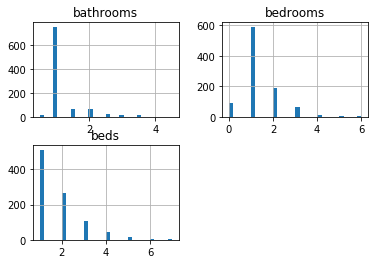

In [12]:
df_no_missing[['bathrooms', 'bedrooms', 'beds']].hist(bins = 30);

### Prices Analysis

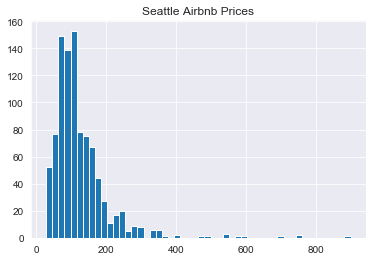

In [133]:
df_no_missing['price'].hist(bins = 50);
plt.title('Seattle Airbnb Prices');

In [112]:
print('The hightes rent is $' + str(df_no_missing['price'].describe().max()) 
      + ' and lowest rent is $' + str(df_no_missing['price'].describe().min()) 
      + '. The avarage rent is $'+str(df_no_missing['price'].describe().min()))

The hightes rent is $957.0 and lowest rent is $28.0. The avarage rent is $28.0


# Model Data and Results


Trying to answer the bussniess quesions.

### 1. What are the top 5 expensive neighborhoods?

In [13]:
df_no_missing.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(5)

neighbourhood
Portage Bay          344.250000
Meadowbrook          250.000000
Pike Place Market    225.888889
Pioneer Square       216.000000
South Lake Union     192.666667
Name: price, dtype: float64

### 2. What are the top 5 expensive hosts?

In [14]:
df_no_missing.groupby('host_name')['price'].mean().sort_values(ascending=False).head(5)

host_name
Clay                     575.0
Heather, Mike & Eleni    490.0
Heath                    400.0
Trung                    392.5
Chasten                  385.0
Name: price, dtype: float64

### 3. Examine linear regression model for price prediction

Her we are using heat map understand the correlation between the variables

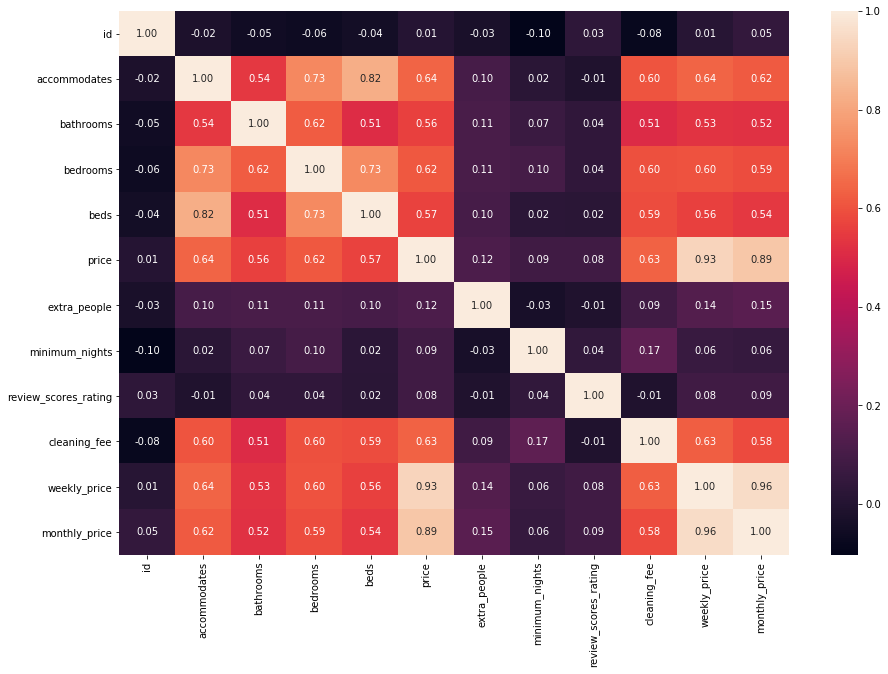

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_no_missing.corr(), annot=True, fmt=".2f");

We are only going to choose few columns that will be used in the prediction model.


### Linear Regression Model

In [18]:
X = df_no_missing[['accommodates','bathrooms','bedrooms','beds','extra_people','minimum_nights',
              'review_scores_rating', 'cleaning_fee', 'weekly_price','monthly_price']]
y = df_no_missing['price']

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.25, random_state=42);
lm_model = LinearRegression(normalize=True);
lm_model.fit(X_train, y_train);

### Performance Measurement

The R-squared score

In [102]:
y_test_preds = lm_model.predict(X_test)# Predictions here using X and lm_model
r2_test = r2_score(y_test, y_test_preds) # Rsquared here for comparing test and preds from lm_model

# Print r2 to see result
print('The r-squared score for the model is ' + str(r2_test.round(3)))

The r-squared score for the model is 0.902


# To Recap

The top 5 expensive neighborhoods in Seattle are Portage Bay, Meadowbrook, Pike Place Market, Pioneer Square, and South Lake Union, and the top 5 expensive hosts are Clay, Heather, Mike & Eleni, Heath, Trung and Chasten. Linear regression is a good option for rent prices. However, trying other statistical learning models might give us a better prediction.